In [1]:
import numpy as np
import pandas as pd

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv',error_bad_lines = False)

In [9]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


***Question 1***:
How do you create an identity matrix in python?

In [37]:
A = [1,2,3,4,5,6]
A

[1, 2, 3, 4, 5, 6]

In [38]:
B = [13, 21, 34]
B

[13, 21, 34]

In [39]:
A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

In [40]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [48]:
data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

***Question 3*** : 
Which of the following fuel type code has the lowest average fuel cost per unit burned?

In [49]:
# To count the sum of each fuel type code
data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()    # gas has the lowest

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

***Question 4***: 
What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

In [67]:
data.describe()   # std is 10.600 and 75th percentile is 17.006

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


***Question 5***: 
What is the skewness and kurtosis for the fuel quantity burned in two decimal places

In [51]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

In [68]:
print( 'skewness of fuel_qty_burned is: {:.2f}'.format( skew(data['fuel_qty_burned'])))
print( 'kurtosis of fuel_qty_burned is: {:.2f}'.format(kurtosis(data['fuel_qty_burned'])))

skewness of fuel_qty_burned is: 15.85
kurtosis of fuel_qty_burned is: 651.26


***Question 6***: 
Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places? 

(Enter answer in the format: Feature: xxx, Total: xxx, Percent: xxx)

In [56]:
data.isnull().sum()   # The feature with the missing values is fuel_unit with 180 missing values

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [71]:
#To get the total number of rows
data.shape[0]

29523

In [72]:
percent_missing = (data['fuel_unit'].isnull().sum()/data.shape[0])*100

In [74]:
print("The percentage of the missing rows in fuel_unit as a factor of the total number of rows in three decimal places is {:.3f}".format(percent_missing))

The percentage of the missing rows in fuel_unit as a factor of the total number of rows in three decimal places is 0.610


***Question 7***
The feature with missing values falls under what category? What missing value imputation technique would you use?

In [84]:
data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

***Answer***: The feature with missing value falls under the category of data type object, hence, we can find the mode of that column and replace the missing value by the mode ( most frequent fuel unit ) which is down below:

In [132]:
data['fuel_unit'].mode()   # This is the mode of the 'fuel_unit' feature, 'mcf'

0    mcf
dtype: object

***Question 8***:
Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?

In [85]:
import seaborn as sns

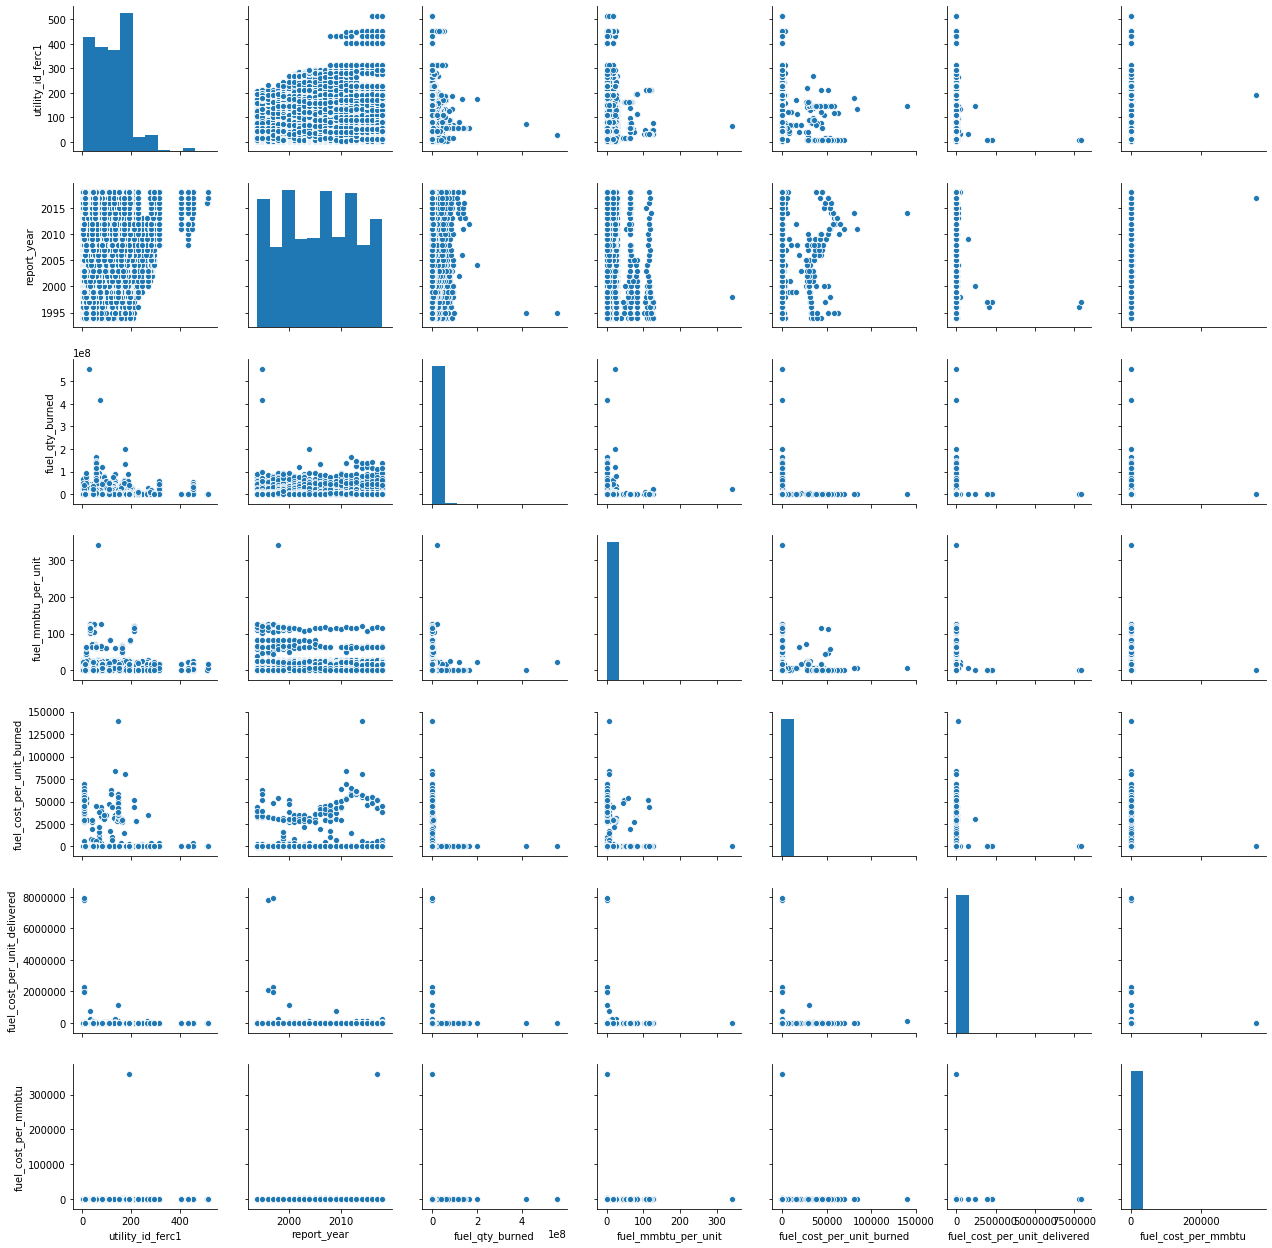

In [87]:
sns.pairplot(data)

In [92]:
data.corr()   # The fuel_qty_burned and fuel_mmbtu_per_unit has the second and third lowest correlation with the Fuel Cost Per Unit Burned

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


***Question 9***: 
For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

In [93]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [108]:
cost_per_year = data[data['fuel_type_code_pudl'] == "coal"].groupby("report_year")['fuel_cost_per_unit_burned'].sum()

In [112]:
cost_per_year

report_year
1994     14984.572
1995     14571.785
1996     12694.803
1997     43742.178
1998     11902.597
1999     16303.468
2000    100428.831
2001     15109.012
2002      9171.164
2003     30954.110
2004      9632.063
2005     11107.182
2006     12402.684
2007     12965.171
2008     14331.348
2009     45554.858
2010     88627.745
2011     17001.015
2012     17546.097
2013     17629.860
2014     15412.197
2015     13338.235
2016     11100.925
2017     10254.284
2018      9488.197
Name: fuel_cost_per_unit_burned, dtype: float64

In [113]:
(11902.597 - 14984.572)/14984.572

-0.20567654518260517

***Question 10***
Which year has the highest average fuel cost per unit delivered?

In [125]:
cost_per_year = data.groupby("report_year")['fuel_cost_per_unit_delivered'].mean()

In [130]:
cost_per_year

report_year
1994       63.636060
1995       32.735269
1996     9196.705948
1997    11140.197239
1998      287.154420
1999       25.551627
2000      985.362877
2001       60.050396
2002       47.594361
2003       55.663493
2004      139.524275
2005       41.438184
2006       38.657484
2007       43.325023
2008       58.588197
2009      652.694163
2010       91.862105
2011       59.774667
2012       60.994502
2013      172.307591
2014      192.737183
2015      326.535511
2016      103.901761
2017       46.196861
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64

In [144]:
print('The year with the highest average fuel cost per unit delivered is {}'.format(np.argmax(cost_per_year)))

The year with the  highest average fuel cost per unit delivered is 1997
